homework 10
---
due: June 8 2022

authors: pegler, prüwasser, scheftner

## Part 1
Take all the necessary code from tutorial 12, re-use it in the function below:
The function should take 4 input parameters:
1. `mean_signal`: mean of signal distribution
2. `sd`:  same for signal and noise
3. `crit`: criterion (above which response is signal)
4. `n_trials`: number of trials (half of which is signal, half noise)

The function should perform the simulation as above and return the hit rate and false alarm rate

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

signal_mean = 4
noise_mean = 0  
sd = 2  
crit = 2 
n_trials = 1000
x = np.linspace(-10, 15, 100)
signal = stats.norm.pdf(x, loc = signal_mean, scale = sd)
#mean_signal = np.mean(signal)


def sim_exp(signal_mean, noise_mean, sd, crit, n_trials):
    stimuli = np.random.permutation(np.concatenate((np.ones(int(n_trials / 2)), np.zeros(int(n_trials / 2)))))
    neural_response = np.zeros(n_trials)
    
    for i in range(n_trials): 
        if stimuli[i]==0:
            neural_response[i] = np.random.normal(noise_mean, sd)
        else:
            neural_response[i] = np.random.normal(signal_mean, sd)
    res = np.zeros(n_trials)
    
    for i in range(n_trials):
        if neural_response[i] > crit:
            res[i] = 1
        else:
            res[i] = 0
        
    hit = np.sum((stimuli == 1) & (res == 1))
    miss = np.sum((stimuli == 1) & (res == 0))
    false_alarm = np.sum((stimuli == 0) & (res == 1))
    corr_reject = np.sum((stimuli == 0) & (res == 0))
    hit_rate = hit / (hit + miss)
    false_alarm_rate = false_alarm / (false_alarm + corr_reject)
    return hit_rate, false_alarm_rate


hit_rate, false_alarm_rate = sim_exp(signal_mean, noise_mean, sd, crit, n_trials)

print(f'Hit rate:         {hit_rate: .1%}')
print(f'False alarm rate: {false_alarm_rate: .1%}')

Hit rate:          84.6%
False alarm rate:  14.0%


 ## Part 2
calling the function above, repeatedly, we can make an ROC curve (that shows the relationship of Hit rate and false alarm rate).
1. keep MeanSignal fixed and change the criterion in a for loop (for the values defined below)
2. visualize  with scatter plot: False alarm Rate on x-axis, Hit rate on y axis
3. do not forget to make the plot nice with legends, labels, fontsize, etc


In [ ]:
np.random.seed(0)
criteria = np.linspace(1, 3, 200) 

plt.figure(figsize = (7, 6))
for c in criteria:
    hit_rate, false_alarm_rate = sim_exp(signal_mean, noise_mean, sd, c, n_trials)
    plt.scatter(false_alarm_rate, hit_rate, c = c, cmap = 'viridis', vmin = 0, vmax = 3, alpha = .6)
cb = plt.colorbar()
cb.set_label(label = "Criterion", fontsize = 11.5)
plt.title('ROC-relationship of Hit Rate and False Alarm Rate', fontsize = 13.5, pad = 15, x = .43)
plt.ylabel('Hit Rate', fontsize = 11.5)
plt.xlabel('False Alarm Rate', fontsize = 11.5);

## Part 3
similarly to the task above, but change both the criterion and the SignalMean (2 embedded for loops, to make multiple ROC curves), and make a scatter plot with the result!

use at least 8 values for criterion and 4 values for SignalMean. 
The 4 values for Signal Mean should be above 0 and below 12.


dots that have the same signal mean (but different Criteria),should show up in the same color.
dots that have different signal mean, should have different colors!    (this will make the figure readable)

do not forget to make the plot nice with legends, labels, fontsize, etc




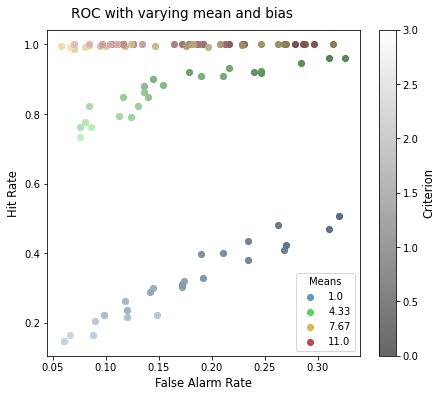

In [51]:
np.random.seed(0)
criteria = np.linspace(1, 3, 24)
means = np.linspace(1, 11, 4)
means_colors = ["steelblue", "limegreen","goldenrod", "firebrick"]

plt.figure(figsize = (7, 6))
mean_dots = []
for c in criteria:
    for i, m in enumerate(means):
        hit_rate, false_alarm_rate = sim_exp(m, noise_mean, sd, c, n_trials)
        mean_dots.append(plt.scatter(false_alarm_rate, hit_rate, c = means_colors[i], alpha = .8))
        plt.scatter(false_alarm_rate, hit_rate, c = c, cmap = 'gray', vmin = 0, vmax = 3, alpha = .6)

cb = plt.colorbar()
cb.set_label(label = "Criterion", fontsize = 11.5)
plt.title('ROC with varying mean and bias', fontsize=13.5, pad=12, x=.43)
plt.ylabel('Hit Rate', fontsize = 11.5)
plt.xlabel('False Alarm Rate', fontsize = 11.5)
plt.legend(mean_dots, np.round(means, 2), title = "Means");